#Продвинутый Python, ДЗ-3

Правила игры:

В домашке 8 задач, разбаловка указана в задании. Суммарно за дз можно получить 100 баллов, что равняется 10 баллам

Дедлайн - 7 дней после выдачи дз. Необходимо залить решеннный ноутбук в github и прислать ссылку в Anytask (без выполнения любого из пунктов работа проверяться не будет)

В данной домашке нужно рисовать графики с помощью matplotlib или же seaborn. Обратите внимание, что все графики и оси должны быть подписаны, графики должны выглядеть аккуратно (за это будем штрафовать)

## Данные

В этом домашнем задании вам придется оказаться на месте аналитика в бразильском маркетплейсе [Olist](https://olist.com/pt-br/). Вам необходимо исследовать данные и на их основании сделать выводы, которые помогут бизнесу расцветать!

Данные находятся тут в файле archive.zip

In [42]:
!pip3 install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import wget

url = 'https://github.com/Palladain/Deep_Python/raw/main/Homeworks/Homework_1/archive.zip'
filename = wget.download(url)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('./')

customers = pd.read_csv('olist_customers_dataset.csv')
location = pd.read_csv('olist_geolocation_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

Ван дано 9 датасетов, которые содержат в себе все данные по 100 000 заказам со всей Бразилии. Чтобы облегчить вам жизнь, вот связи по этим датасетам (файл product_category_name_translation является переводом названий категорий с португальского на английский)

![](https://i.imgur.com/HRhd2Y0.png)

Ну что же, начнем!

## Задание 1 (20 баллов)

Визуализируйте зависимость между средним числом покупок товара и:

* числом фотографий товара

* кол-во символов в описании товара (аггрегируйте с шагом 20)

* кол-во символов в названии (аггрегируйте с шагом 5)

Для подсчета среднего числа покупок нужно посчитать по каждому товару число продаж, а затем взять среднее от него (учтите, что мы считаем только доставленные заказы)

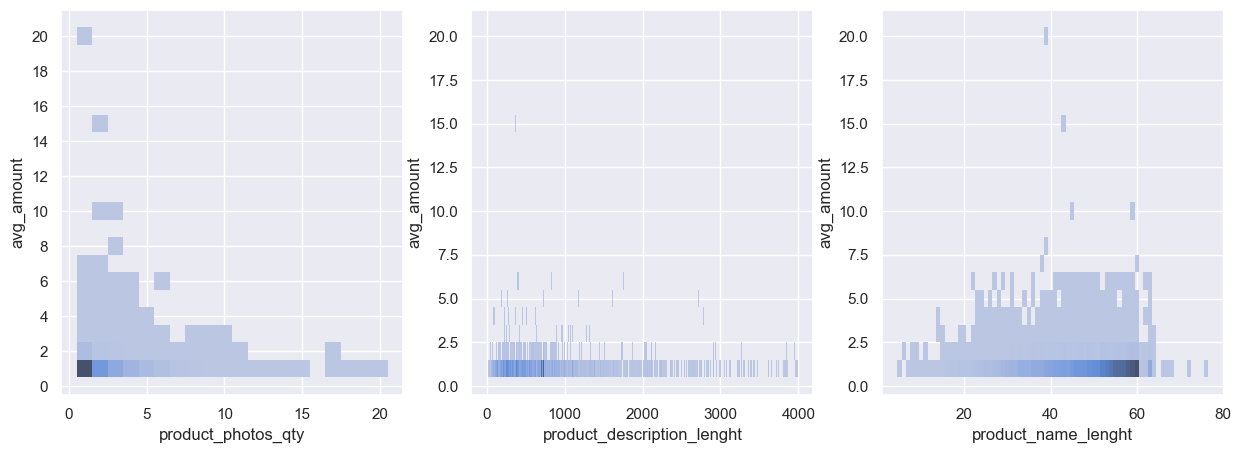

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

items_ = pd.merge(items[['order_id', 'product_id']], orders[['order_id', 'order_status']])

products_avg = items_[items_['order_status'] == 'delivered'].groupby(['product_id', 'order_id']).agg({'order_id':'count'}).groupby('product_id').agg({'order_id': 'mean'}).reset_index().rename(columns={'order_id': 'avg_amount'})

sns.color_palette("tab10") 
sns.set_theme()

fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.yticks([i for i in range(0, 21, 2)])

sns.histplot(data=pd.merge(products_avg, products[['product_id', 'product_photos_qty']], on='product_id'), x="product_photos_qty", y="avg_amount", discrete=True)

plt.subplot(132)

by_length = pd.merge(products_avg, products[['product_id', 'product_description_lenght']], on='product_id')
sns.histplot(data=by_length,  y="avg_amount", x="product_description_lenght", discrete=True, bins=20)

plt.subplot(133)

sns.histplot(data=pd.merge(products_avg, products[['product_id', 'product_name_lenght']], on='product_id'),  y="avg_amount", x="product_name_lenght", discrete=True, bins=5)

plt.show()


## Задание 2 (10 баллов)

Отобразите среднюю сумму оплаты по типу оплаты (для этого вам нужна табличка payments)

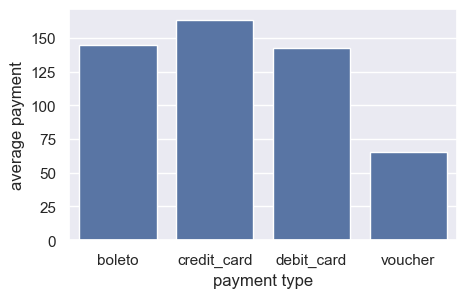

In [45]:
plt.figure(figsize=(5, 3))
sns.barplot(data=payments[['payment_type', 'payment_value']][payments['payment_type'] != 'not_defined']
            .groupby('payment_type')
            .agg({'payment_value': 'mean'})
            .reset_index()
            .rename(columns={'payment_value': 'average payment', 'payment_type': 'payment type'}),
            x='payment type', y='average payment')
plt.show()

## Задание 3 (25 баллов)

Обратите внимание на число платежей (payment_installments). Выясните, какая сумма оплаты указана: за целую покупку или только за ее часть? (Обратите внимание, что в данных есть определенная бага, которую нужно расследовать и учесть)

Также покажите средний чек в зависимости от числа оплат. Есть ли какая-то связь между ними?

1. Цена указана за часть покупки. Например, если оплата кредиткой и ваучером, то отдельно строка с ваучером и сумма оплаты и отдельно кредитка и сумма оплаты, но если payment_installments равна n, то сумма не разбивается на n платежей в таблице.
2. В среднем для довольно дорогих заказов число периодов оплаты в рассрочку больше, чем для дешёвых

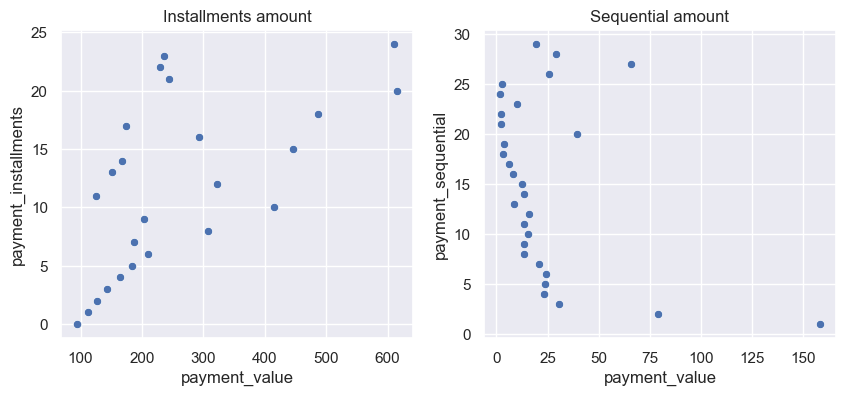

In [46]:
pm = payments[['payment_installments', 'payment_value']].groupby('payment_installments').agg({'payment_value': 'mean'}).reset_index()

pm2 = payments[['payment_sequential', 'payment_value']].groupby('payment_sequential').agg({'payment_value': 'mean'}).reset_index()

fig = plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Installments amount")
sns.scatterplot(data=pm, x='payment_value', y='payment_installments')
plt.subplot(122)
plt.title("Sequential amount")
sns.scatterplot(data=pm2, x='payment_value', y='payment_sequential')

plt.show()

## Задание 4 (15 баллов)

Визуализируйте зависимость между ценой заказа и ценой доставки по штатам покупки. Есть ли какая-нибудь зависимость и как вы можете ее обосновать?

Можно увидеть, как распределение движется вверх с увеличением цены заказа - обосновать можно тем, что компания берёт деньги за ценность товара(его нужно аккуратнее доставлять), но всё же для товаров одной и той же цены бывает разная цена доставки(так как цена доставки зависит больше от веса товара и штата отправителя-покупателя)

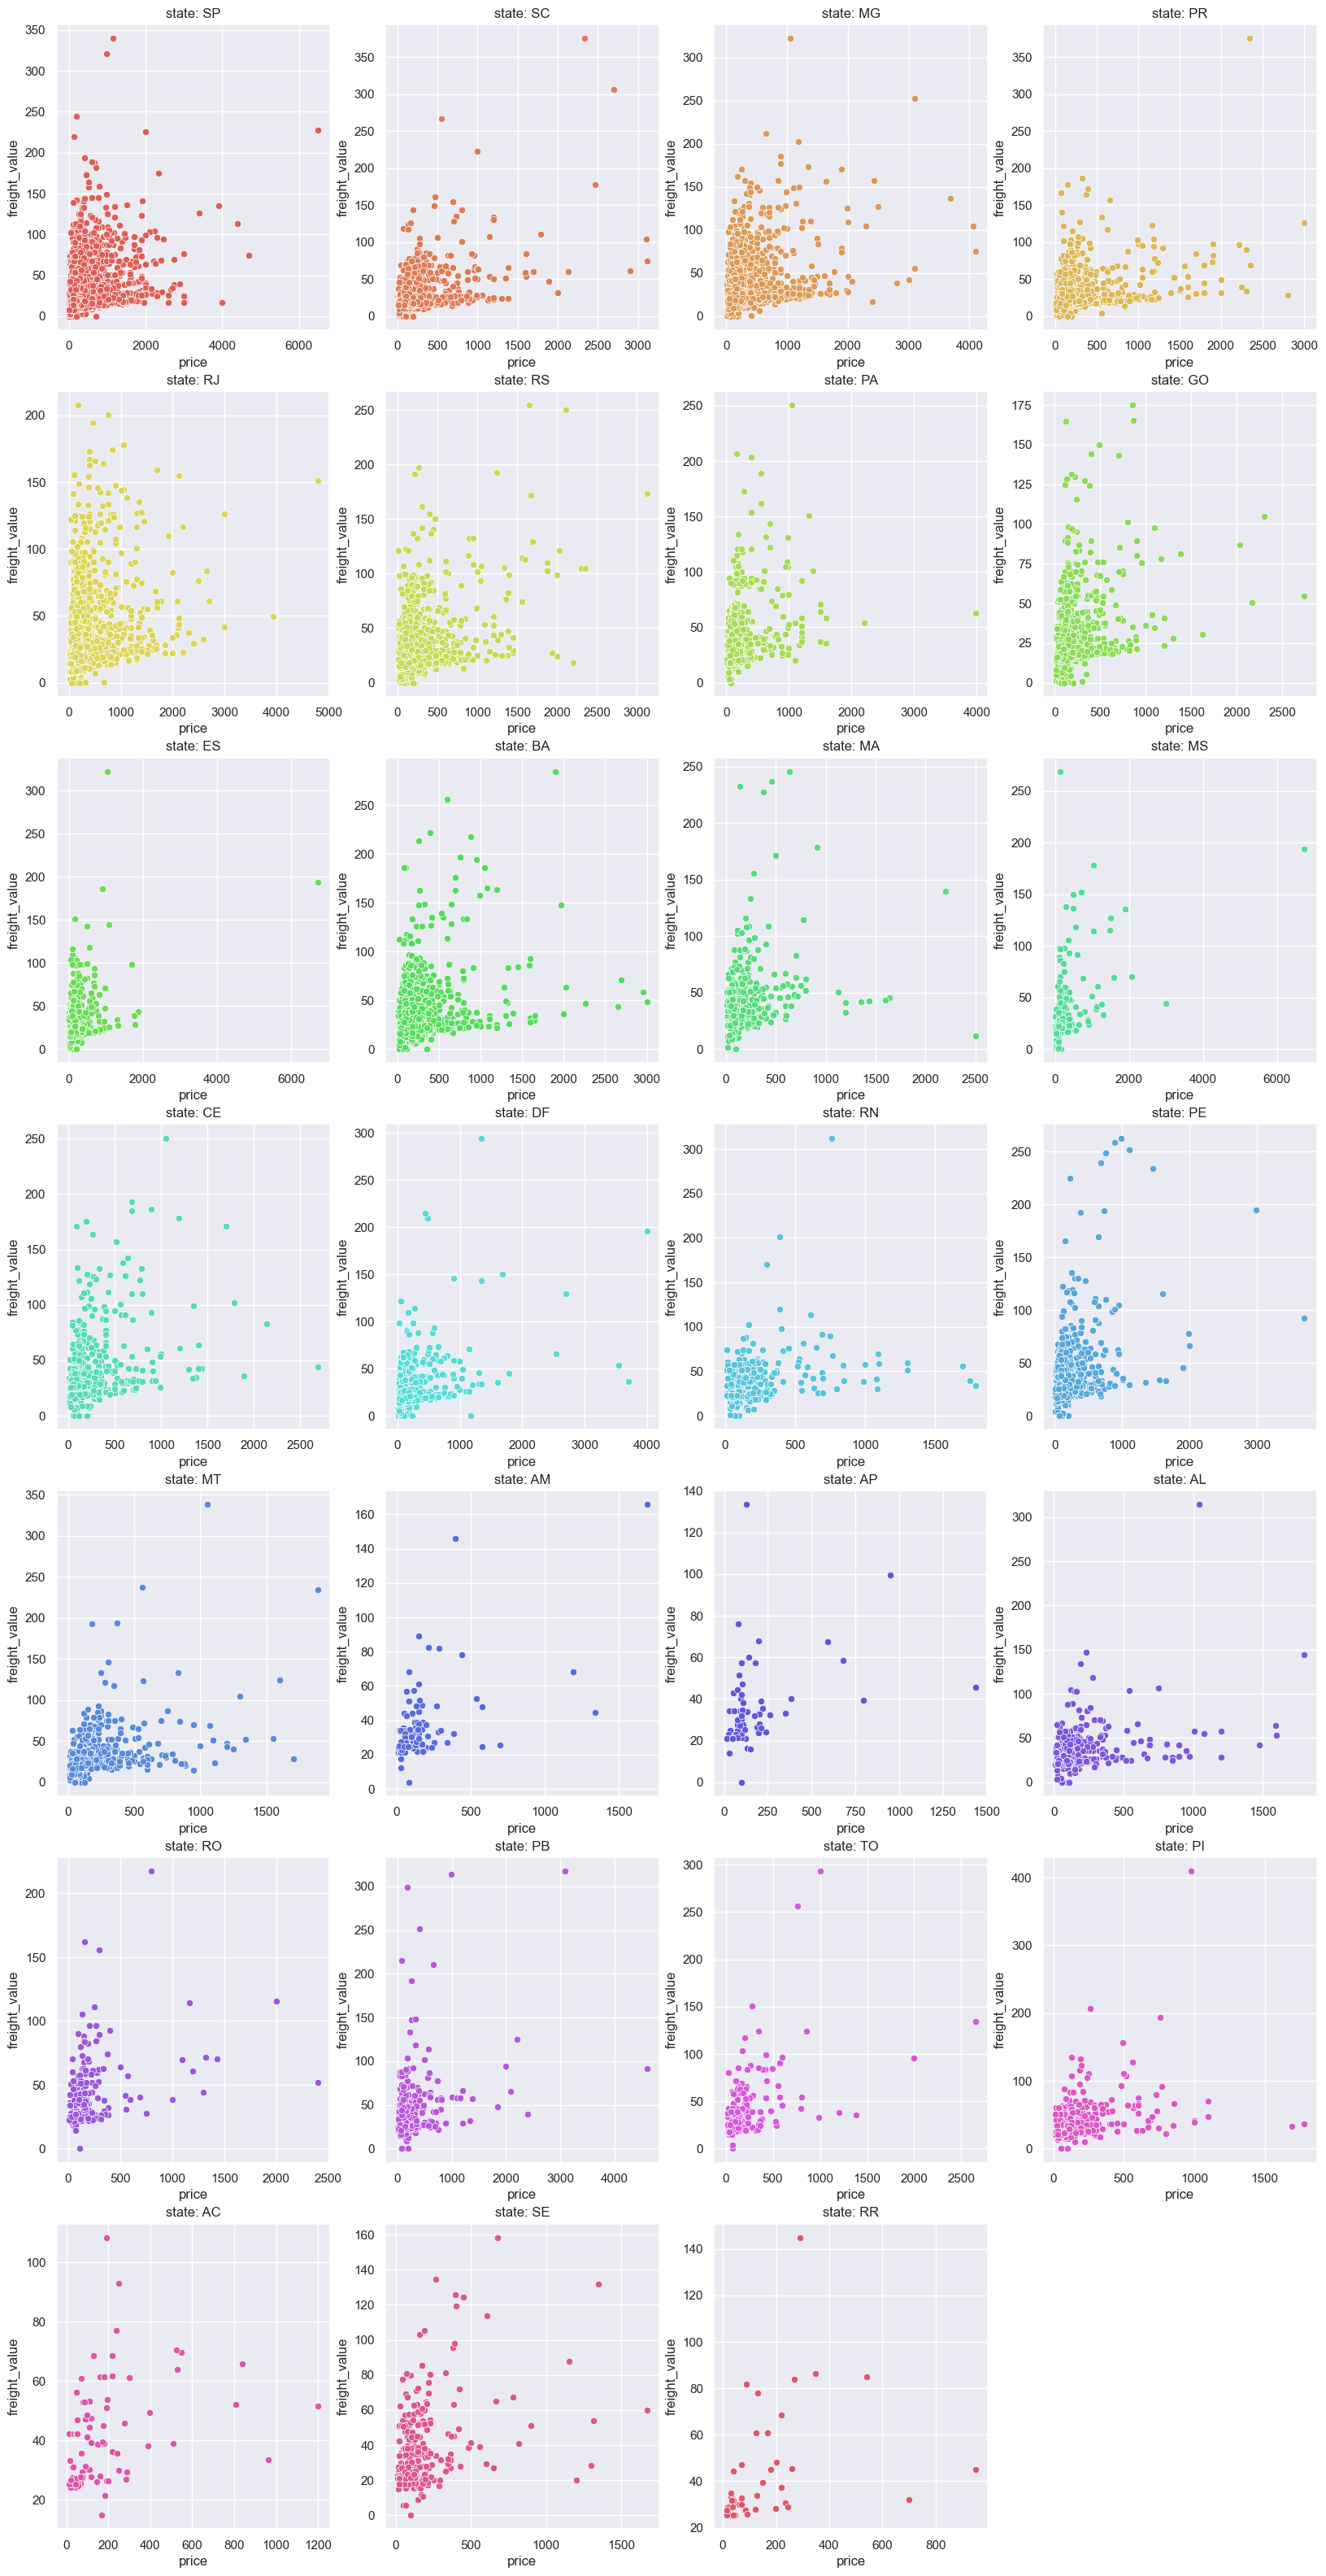

In [47]:

cols = pd.unique(customers[['customer_state']].values[:, 0])
df = pd.merge(pd.merge(customers[['customer_id', 'customer_state']], orders[['order_id', 'customer_id']]), items[['order_id', 'price', 'freight_value']], on='order_id')


fig = plt.figure(figsize=(20, 40))
colors = sns.color_palette("hls", 27)

for i, col in enumerate(cols):
    ax = fig.add_subplot(7, 4, i + 1)
    ax.title.set_text(f"state: {col}")
    sns.scatterplot(data=df[df['customer_state'] == col], x='price', y="freight_value", color=colors[i])
    
plt.show()

## Задание 5 (15 баллов)

Отобразите распределение оценок для заказов, которые были доставлены вовремя и которые пришли с опозданием. Насколько влияет факт опоздания на оценку? (оценки берутся из таблицы reviews)

Как видно по графикам, большинство покупателей не ставит выше 5 если доставлено не вовремя(что логично)

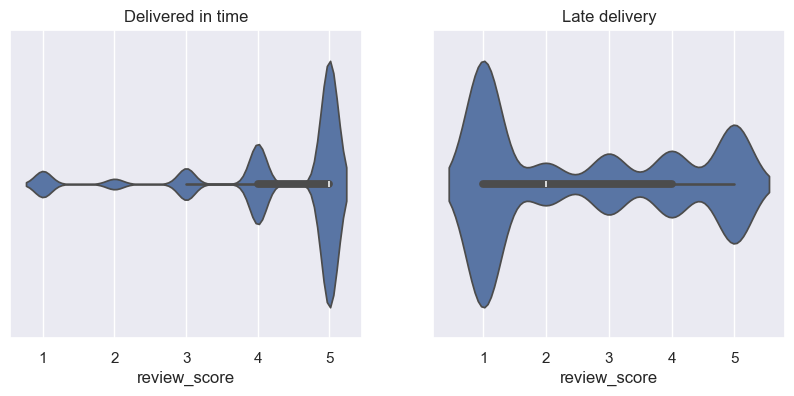

In [48]:
df = pd.merge(orders[['order_id', "order_delivered_customer_date", "order_estimated_delivery_date"]], reviews[['order_id', 'review_score']], on='order_id')


fig = plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Delivered in time")
sns.violinplot(data=df[df['order_delivered_customer_date'] <= df['order_estimated_delivery_date']], x='review_score')
plt.subplot(122)
plt.title("Late delivery")
sns.violinplot(data=df[df['order_delivered_customer_date'] > df['order_estimated_delivery_date']], x='review_score')

plt.show()

## Задание 6 (15 баллов)

Изобразите зависимость между ценой заказа и числом дней между покупкой и доставкой с разбивкой по признаку "есть заказ из другого штата". Есть ли зависимость?

1. По графикам видно, что для достаточно дорогиих товаров обработка и доставка заказа выходит быстрее.
2. Если штаты продавца и покупателя разные, то заказ будет ехать скорее дольше.

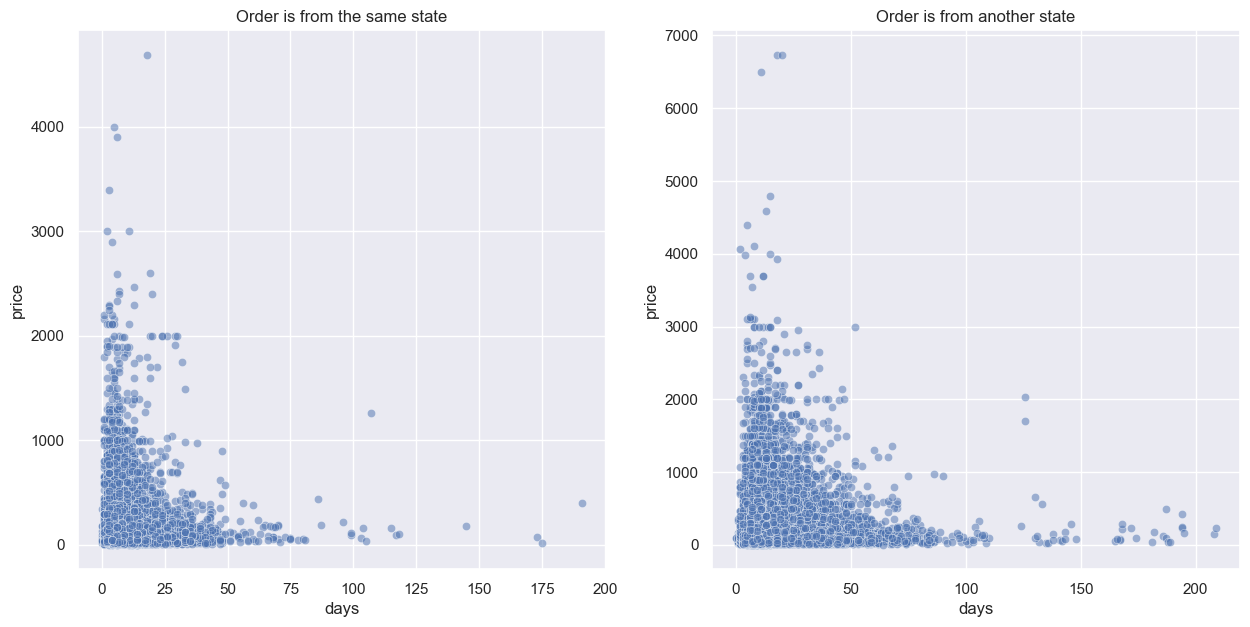

In [49]:
# sellers -> seller_id, seller_state
# orders -> order_id, customer_id, order_purchase_timestamp, order_delivered_customer_date
# customers -> customer_id, customer_state
# items -> order_id, seller_id

order_state_from = pd.merge(items[['order_id', 'seller_id', 'price']], sellers[['seller_id', 'seller_state']], on='seller_id')[['order_id', 'seller_state', 'price']].drop_duplicates()

order_state_to = pd.merge(orders, customers[['customer_id', 'customer_state']], on='customer_id')[['order_id', 'customer_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'customer_state']]

order_state_to['order_purchase_timestamp'] = pd.to_datetime(order_state_to['order_purchase_timestamp'])
order_state_to['order_delivered_customer_date'] = pd.to_datetime(order_state_to['order_delivered_customer_date'])


order_state_to['days'] = (order_state_to['order_delivered_customer_date'] - order_state_to['order_purchase_timestamp'])
order_state_to['days'] = order_state_to.days.apply(lambda x: x.days)

df = pd.merge(order_state_from, order_state_to, on='order_id')

fig = plt.figure(figsize=(15, 7))
plt.subplot(121)
plt.title("Order is from the same state")
sns.scatterplot(data=df[df['customer_state'] == df['seller_state']], x='days', y='price', alpha=.5)

plt.subplot(122)
plt.title("Order is from another state")
sns.scatterplot(data=df[df['customer_state'] != df['seller_state']], x='days', y='price', alpha=.5)

plt.show()